It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?

Which seem to perform the best? Why?

Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

## Changes: All caps

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [2]:
data = 'amazon_cells_labelled.txt'

df = pd.read_csv(data, delimiter= '\\t', header=None)

# 1 = positive, 0 = negative

df.columns = ['review', 'score']

c:\users\conno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#df.head()

In [4]:
# clean up text
#df['review'] = df['review'].apply(lambda x: x.lower()
#           .replace("''", "").replace(".", "").replace("!", "")
#           .replace("?", "").replace(";", "").replace(":", "")
#           .replace("*", "").replace("(", "").replace(")", "")
#           .replace("&", "").replace("/", "").replace("'", ""))

In [5]:
#df.head()

In [6]:
pos_kwds = ['good', 'great', 'best', 'amazing', 'excellent', 'incredible', 'fantastic', 'satisfied', 'terrific', 'quality', 'happy', 'glad']

neg_kwds = ['bad', 'awful', 'terrible', 'horrible', 'broken', 'refund', 'worst', 'cheap', 'not', 'dont', 'cant', 'wont', 'shouldnt', 'never'] #ugly

In [7]:
#df1['allcaps'] = df1.review.str.isupper()

In [8]:
df2 = df.copy()

In [9]:
df2['allcaps'] = df2.review.str.isupper()

In [10]:
for key in pos_kwds:  
    df2[str(key)] = df2.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

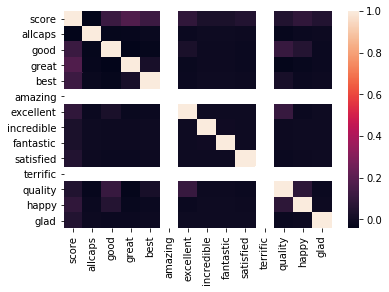

In [11]:
sns.heatmap(df2.corr())

In [12]:
#df2['allcaps'] = df2.review.str.isupper()

In [13]:
df2.head()

,review,score,allcaps,good,great,best,amazing,excellent,incredible,fantastic,satisfied,terrific,quality,happy,glad
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#df2.score.value_counts()

In [15]:
# convert to boolean
df2['score'] = (df2['score'] == 1)

In [16]:
df2.head()

,review,score,allcaps,good,great,best,amazing,excellent,incredible,fantastic,satisfied,terrific,quality,happy,glad
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False


## TEST

In [17]:
#data = df2[pos_kwds + ['allcaps']]
data = df2[pos_kwds + ['allcaps']]
target = df2['score']

In [18]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy : {}%".format(100 * (1 - ((target != y_pred).sum() / data.shape[0]))))

Number of mislabeled points out of a total 1000 points : 405
Accuracy : 59.5%


In [19]:
confusion_matrix(target, y_pred)

array([[475,  25],
       [380, 120]], dtype=int64)

In [20]:
TP, TN, FP, FN = 0, 0, 0, 0

for i in range(len(y_pred)): 
    if target[i] == y_pred[i] == 1:
        TP += 1
    if y_pred[i] == 1 and target[i] == 0:
        FP += 1
    if target[i] == y_pred[i] == 0:
        TN += 1
    if y_pred[i] == 0 and target[i] == 1:
        FN += 1
        
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("True Positives: ", TP)
print("True Negatives: ", TN)

False Positives:  25
False Negatives:  380
True Positives:  120
True Negatives:  475


In [21]:
# sensitivity: % of positives correctly identified

pos = 0

for i in range(len(target)): 
    if target[i]== 1:
        pos += 1
        
print('Sensitivity is: {}%'.format(100 * TP/pos))

Sensitivity is: 24.0%


In [22]:
# specificity: % of negatives correctly identified

neg = 0

for i in range(len(target)): 
    if target[i]== 0:
        neg += 1
        
print('Specificity is: {}%'.format(100 * TN/neg))

Specificity is: 95.0%


In [23]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.615
Testing on Sample: 0.595


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.59, 0.58, 0.59, 0.61, 0.63, 0.58, 0.59, 0.6 , 0.56])